In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load the Heart Disease dataset from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
           'oldpeak', 'slope', 'ca', 'thal', 'target']

# Load dataset
df = pd.read_csv(url, names=columns)

# Replace '?' with NaN and drop rows with missing values
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

# Convert columns to numeric type
df = df.apply(pd.to_numeric)

# Convert the target variable: 0 for no heart disease, 1 for heart disease
df['target'] = (df['target'] > 0).astype(int)

# --- Visualization: Before Training ---

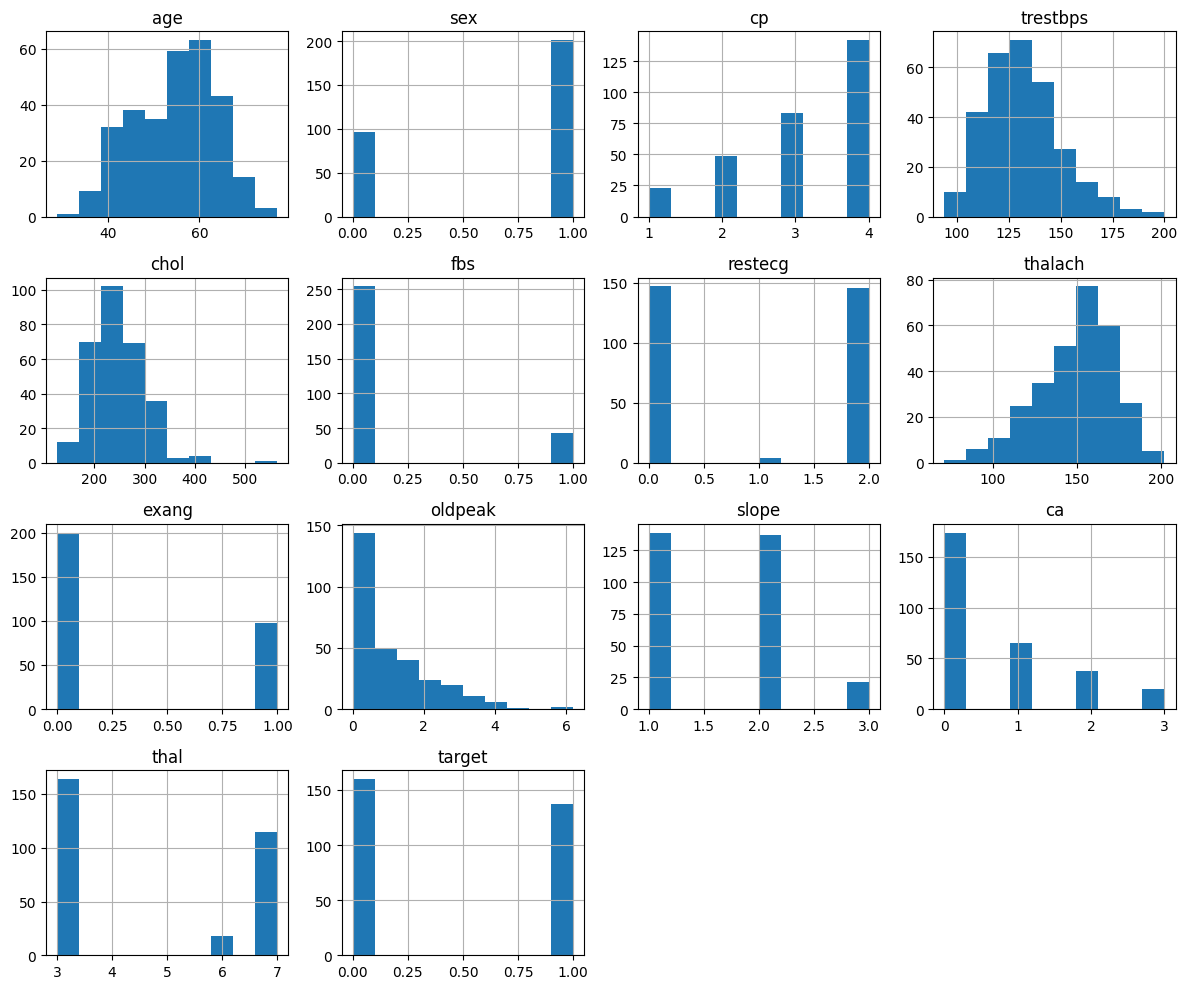

<ipython-input-4-8ea0e9ef5017>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


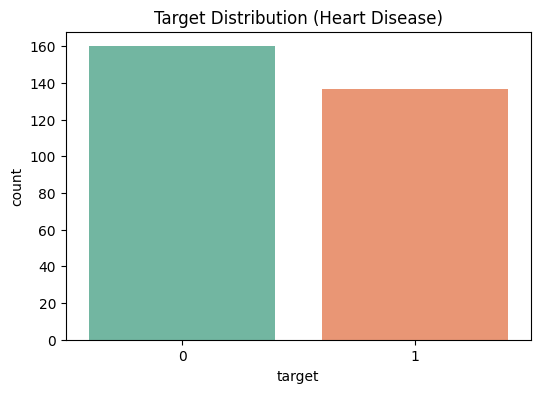

In [4]:
# 1. Distribution of features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# 2. Distribution of the target variable (Heart Disease or Not)
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Target Distribution (Heart Disease)')
plt.show()

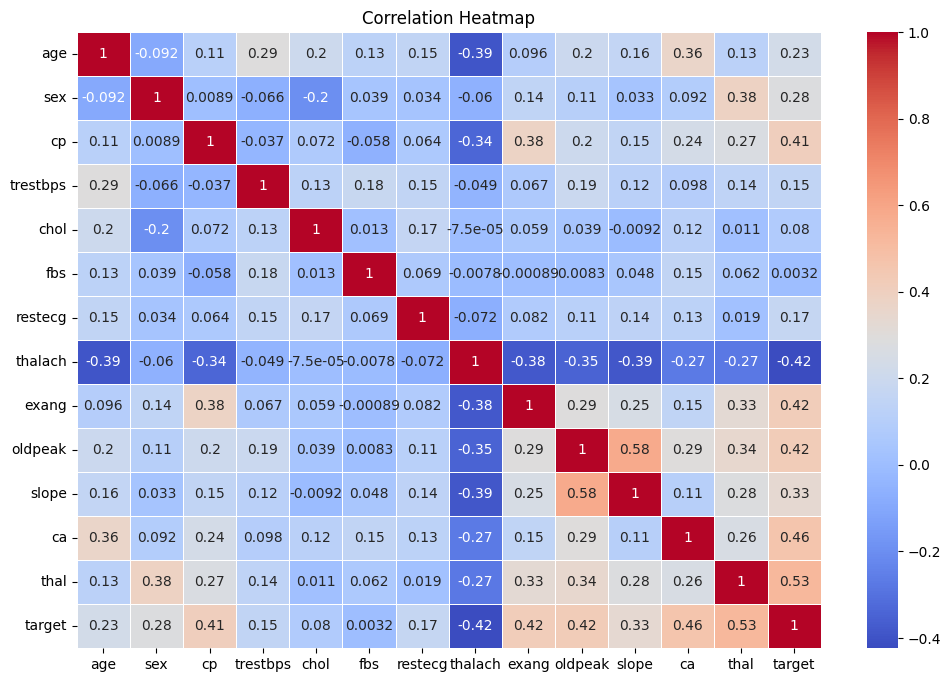

In [5]:
# 3. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# --- Preprocessing and Training ---

# Split data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbm.predict(X_test)


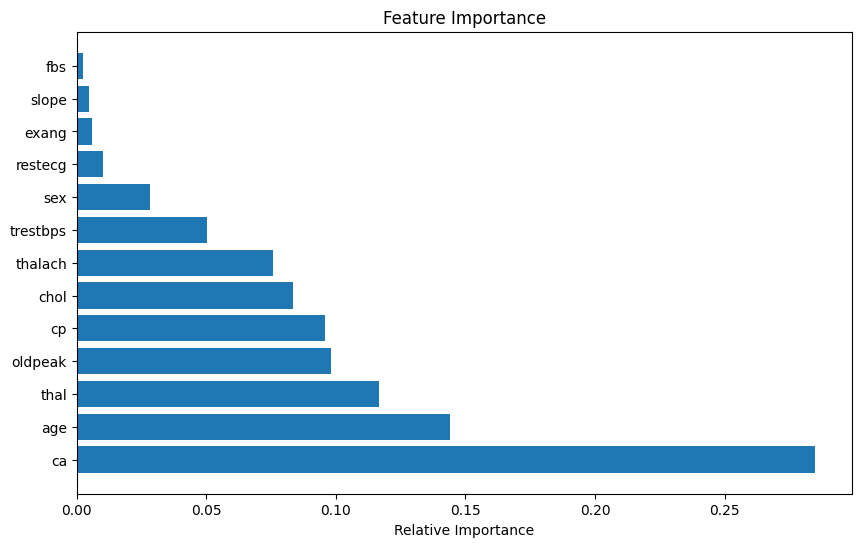

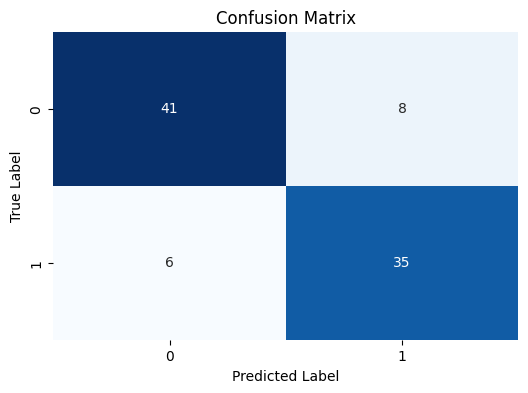

In [7]:
# 4. Feature importance plot
importances = gbm.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 5. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()